# 住宅情報の分析

## エイムズ市の住宅価格
アイオワ州エイムズ市の住宅価格データセットを使い、基本的なデータの扱い方を学んでいきます。

住宅に関する79種類もの説明変数が用意されているため、それらと価格との関係を探索していきましょう。

エイムズがどのような街なのかもWikipediaなどで確認しておくと良いでしょう。

## Kaggleのカーネル
Kaggleでは「カーネル」としていろいろな人がデータ探索（EDA）を行ったコードが共有されています。良いEDAをたくさん見て、ノウハウを吸収していきましょう。今回の課題をやる上でも参考にしたり、課題になっていないことに挑戦したりしてください。

これ以降Kaggleを利用していきますので、アカウントを作成してください。

## データセットの準備
データセットはKaggleからダウンロードします。

[House Prices: Advanced Regression Techniques | Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

上記URLを開き、Dataのページへ移動してください。

この中のtrain.csvを使用します。これをダウンロードし、Jupyter Notebookで使っているディレクトリに置いてください。

In [1]:
#ライブラリのインポート
import pandas as pd
import numpy as np
import pylab as pl

#欠損値処理
import missingno as msno

#グラフ描写ツール
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

## 【問題1】データセットの取得
pd.read_csv()を使用して、変数に格納してください。

In [2]:
train=pd.read_csv("train.csv")
display(train)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


## 【問題2】データセット自体の調査
KaggleのOverviewページや、Dataページの「Data fields」などを読みながら、どのようなデータセットかを説明してください。

アイオワ州エイムズ市の住宅価格データセット。

住宅に関する79種類の説明変数があり、売却価格、建物情報(規模や形状、設備、各部屋や庭の状況、使用部材や材料情報)、立地情報(周辺情報やアクセス)、販売年月や方法、条件などがセットされている

今回の目的変数はセールプライス。

## データの概観

## 【問題3】データの確認
データを確認していきます。コードとマークダウンを組み合わせてレポートしてください。

- 各特徴量がどういったものかを見る。（数値データか文字データなど）

info()で各特徴量のデータタイプを確認する
→dtypes: float64(3), int64(35), object(43)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

今回の目的変数は、”SalePrice”

In [4]:
train["SalePrice"].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

- 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [5]:
"""
特徴量の平均値と標準偏差、四分位数を一度に表示
"""
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 問題4】欠損値への対応
欠損値に関して以下のことを行い、レポートしてください。

- 各特徴量の欠損値の有無を確認する。
欠損値の確認にはmissingnoというライブラリを活用しましょう。このライブラリにより欠損値の有無が可視化できます。インストールや使い方に関しては以下のページをご覧ください。

[ResidentMario/missingno: Missing train visualization module for Python.](https://github.com/ResidentMario/missingno)

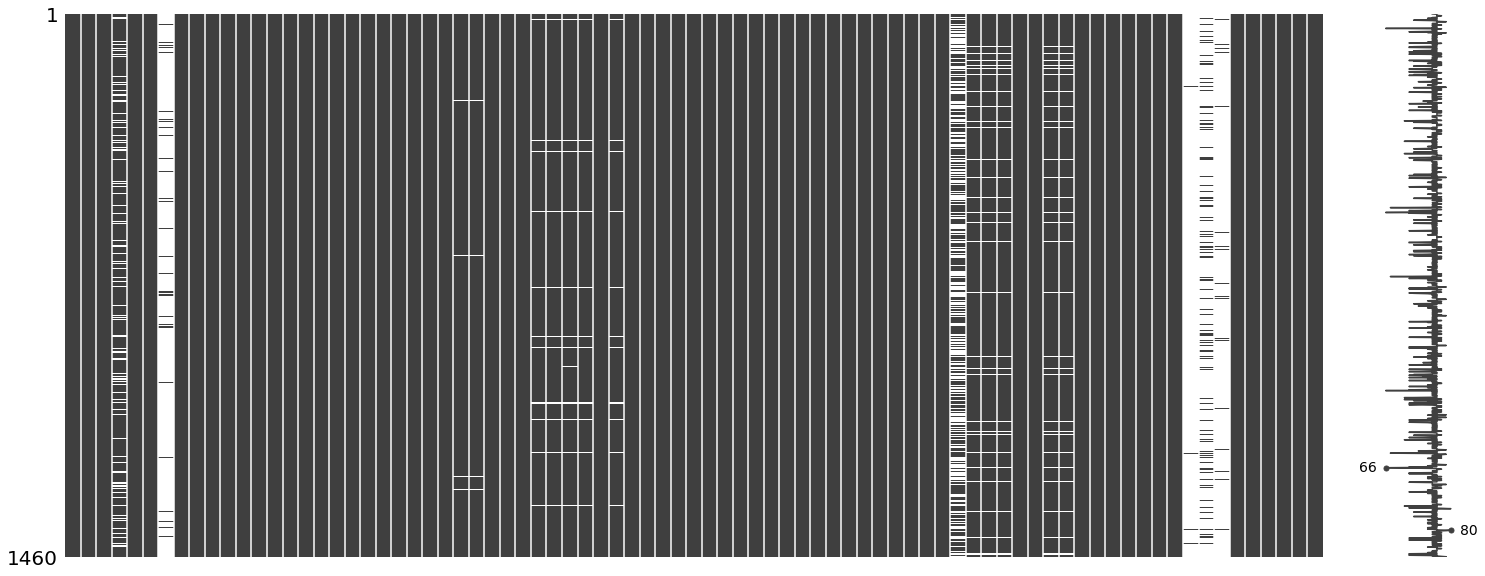

In [6]:
msno.matrix(train);

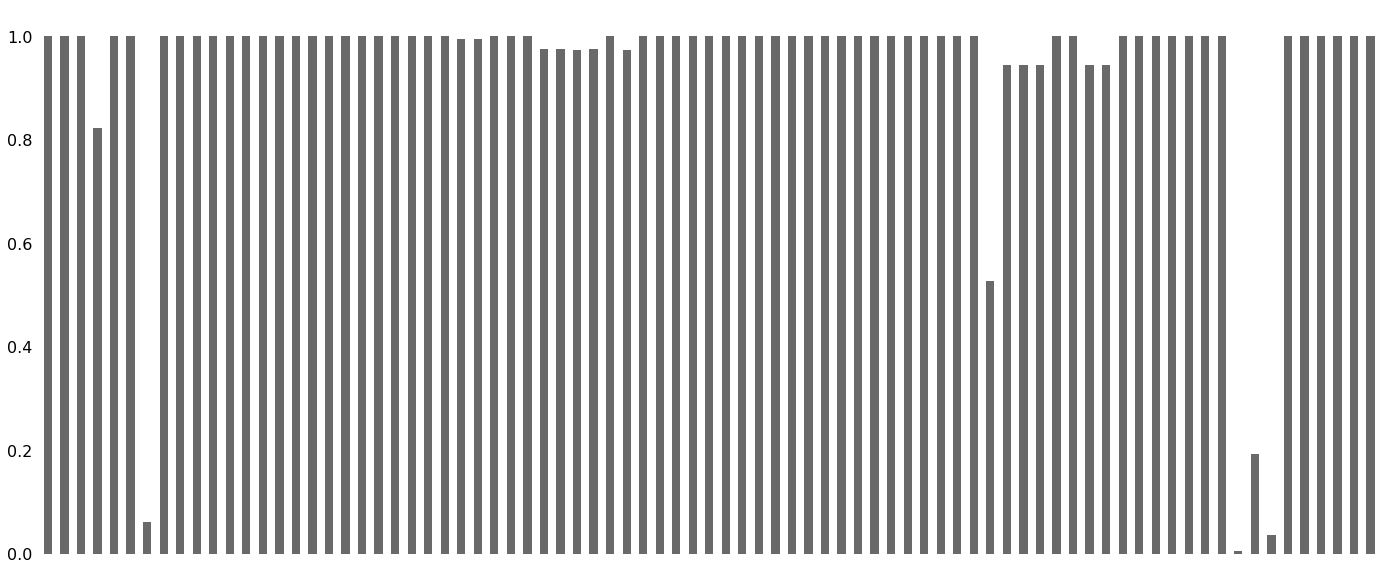

In [5]:
msno.bar(train)

- 欠損値が何パーセント含まれるかを確認する。

In [8]:
"""
データセットに含まれるnull数と割合を求める関数作成
"""
#サイト抜粋
def null_count(df):
    total=train.isnull().sum().sort_values(ascending=False)
    missing_ratio=(train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
    train_missing=pd.concat([total, missing_ratio],axis=1,keys=["total","missing_ratio"])
    return train_missing

In [9]:
"""
上の関数を使ってアイオワ州の住宅trainデータのnull数と割合を算出
"""
null_count(train)

,total,missing_ratio
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


- 5つ以上欠損値がある特徴量（列）は削除する。

In [9]:
# 欠損が5個以上ある列を削除する

threshold=5
missing_features=train_missing.query("total >= {}".format(threshold)).index
print("欠損が{}個以上ある特徴量の一覧：\n{}".format(threshold, missing_features))


欠損が5個以上ある特徴量の一覧：
Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
       'MasVnrArea', 'MasVnrType'],
      dtype='object')


In [12]:
# 欠損が5個以上ある列を削除する
drop_features=train.drop(missing_features, axis=1)
display(drop_features.head())

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


- 欠損値があるサンプル（行）は削除する。

残っているサンプル数：1459


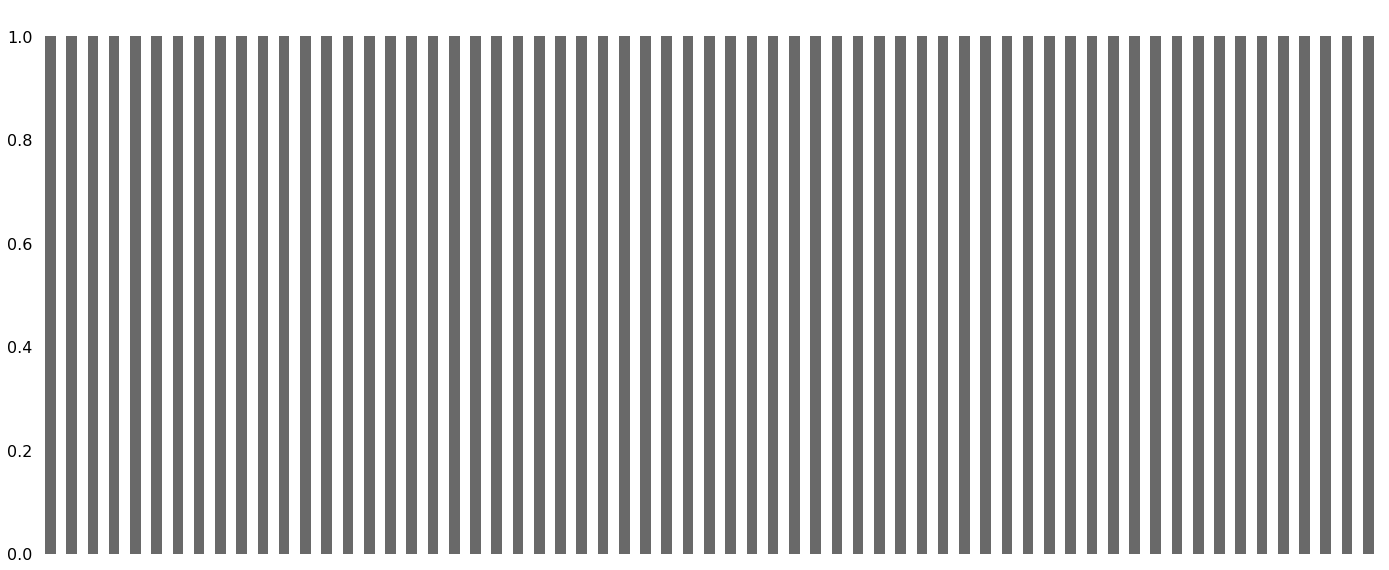

In [14]:
"""
欠損値があるサンプル（行）は削除する。 
axis=0,how='any'を指定すると欠損値を含む全ての列を削除する
"""
train_dropna=drop_features.dropna(axis=0)#dropna axis=0で行に対して欠損値を削除する
train_dropna=train_dropna.reset_index(drop=True)#indexが歯抜けになるのでindex を整理し直す
print("残っているサンプル数：{}".format(len(train_dropna)))
msno.bar(train_dropna) # 確認

## 目的変数
次は目的変数がどのような分布を持っているか確認していきます。

## 【問題5】用語の調査

尖度（せんど、英: kurtosis)は、確率変数の確率密度関数や頻度分布の鋭さを表す数字である。
正規分布と比べて、尖度が大きければ鋭いピークと長く太い裾を持った分布を持ち、
尖度が小さければより丸みがかったピークと短く細い尾を持った分布であるという事が判断できる。

「歪度」とは、分布の歪み度合いを示す数字である。
正規分布のように左右対称であるのか、それとも片方の裾だけだ伸びたような歪んだ分布なのか、その度合いを示します。
これを歪度（または歪度係数）といって、歪度が0 よりも大きければ右の裾が長い分布、
歪度が0 よりも小さければ左の裾が長い分布となります。

## 【問題6】分布の確認
- seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。

対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。

歪度=1.88  尖度=6.54


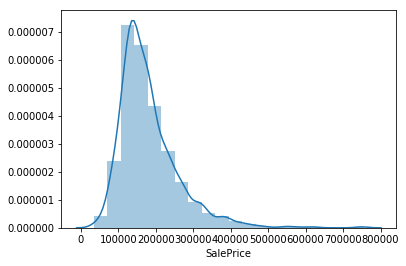

In [24]:
"""
seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。
http://pynote.hatenablog.com/entry/seaborn-histogram
sns.distplot(X)ってやったらエラー。
カラム名を入れる必要があった。dfを突っ込んだからどのカラムか分からないでコケたと推察。
"""
print("歪度={:.2f}  尖度={:.2f}".format(train.SalePrice.skew(),train.SalePrice.kurtosis()))
sns.distplot(train.SalePrice, bins=20)

目的変数に対して対数変換を行う。


In [28]:
"""
目的変数に対して対数変換を行う
(参考)https://qiita.com/ynakayama/items/2c3782c82317f21596ba
"""

Xh = train.SalePrice.apply(np.log)
print("歪度 ={:.2f}尖度={:.2f}".format(Xh.skew(),Xh.kurtosis()))

歪度 =0.12尖度=0.81


対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。



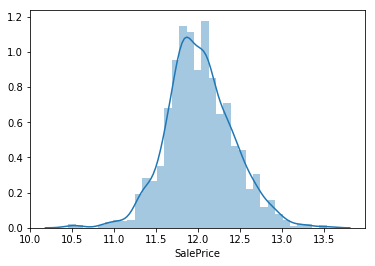

In [29]:
sns.distplot(Xh)


## 【問題7】相関係数の確認
特徴量の確認をしていきます。それぞれに対してマークダウンで説明や考察を書いてください。

《補足》

重回帰分析などで予測する場合、相関が高すぎる特徴量の組み合わせがあると予測に悪影響が出ることがあります。このような場合の簡単な対処方法として、そういった特徴量の組みを探し出して、１つに絞るということがあります。

- 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。


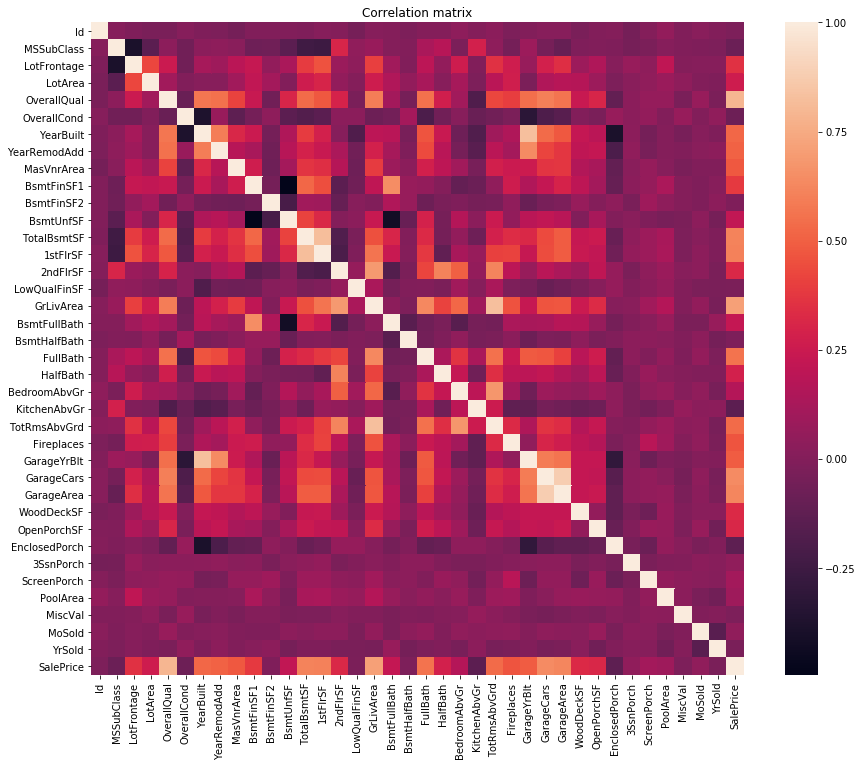

In [32]:
# 相関係数行列のヒートマップを作る

train_corr = train.corr()
plt.subplots(figsize=(15, 12))
plt.title('Correlation matrix')
sns.heatmap(train_corr, vmax=1.0, square=True)

- 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。


In [36]:
# SalePriceとの相関をソート
train_corr_saleprice=train_corr["SalePrice"].sort_values(ascending=False)
print(train_corr_saleprice[1:11])


OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


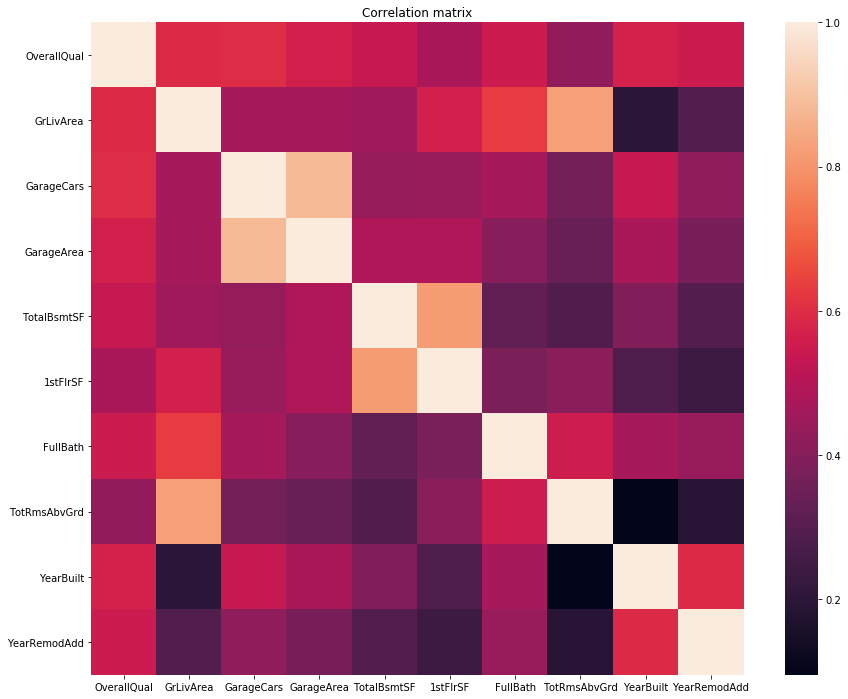

In [40]:
train_high_corr_saleprice = train[train_corr_saleprice[1:11].index]
train_hight_corr_saleprice_corr=train_high_corr_saleprice.corr()

plt.subplots(figsize=(15, 12))
plt.title('Correlation matrix')
sns.heatmap(train_hight_corr_saleprice_corr, vmax=1.0, square=True)
plt.show()

In [44]:
train_hight_corr_saleprice_corr

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
OverallQual,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.550600,0.427452,0.572323,0.550684
GrLivArea,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.630012,0.825489,0.199010,0.287389
GarageCars,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.469672,0.362289,0.537850,0.420622
GarageArea,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.405656,0.337822,0.478954,0.371600
TotalBsmtSF,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.323722,0.285573,0.391452,0.291066
1stFlrSF,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.380637,0.409516,0.281986,0.240379
FullBath,0.550600,0.630012,0.469672,0.405656,0.323722,0.380637,1.000000,0.554784,0.468271,0.439046
TotRmsAbvGrd,0.427452,0.825489,0.362289,0.337822,0.285573,0.409516,0.554784,1.000000,0.095589,0.191740
YearBuilt,0.572323,0.199010,0.537850,0.478954,0.391452,0.281986,0.468271,0.095589,1.000000,0.592855
YearRemodAdd,0.550684,0.287389,0.420622,0.371600,0.291066,0.240379,0.439046,0.191740,0.592855,1.000000


- 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。


#### →特徴量の説明

OverallQual：全体的な仕上げ材料や素材の品質

GrLivArea：地上のリビングエリアの面積

GarageCars：	車におけるガレージの規模

GarageArea：ガレージの規模

TotalBsmtSF：地下室の面積(平方フィート)

1stFlrSF：１階床面積

FullBath：完全完備のバスルーム

TotRmsAbvGr：バスルーム以外の部屋数の合計	

YearBuilt：建設年

YearRemodAd：改築年

参考文献

[初めてのデータ分析](https://qiita.com/katoriya/items/342434a2a5a7a1fd8ad1#%E5%B0%96%E5%BA%A6%E3%81%9B%E3%82%93%E3%81%A9)

[pandasで欠損値NaNを除外（削除）・置換（穴埋め）・抽出](https://note.nkmk.me/python-pandas-nan-dropna-fillna/)

[pythonでのデータ分析　欠損値の取扱い](https://qiita.com/taka000826/items/e859622583dc2ab78fea#3-%E6%AC%A0%E6%90%8D%E5%80%A4%E3%81%A8%E3%81%84%E3%81%86%E5%80%A4%E3%81%A8%E3%81%97%E3%81%A6%E6%89%B1%E3%81%86)

[missingno/README.md](https://github.com/ResidentMario/missingno/blob/master/README.md)

[歪度，尖度の定義と意味](https://mathtrain.jp/waidosendo)

[3-5. 歪度と尖度](https://bellcurve.jp/statistics/course/17950.html)

[3回目 Kaggle HousePrices](https://qiita.com/Yuta33553297/items/3a1bbd0597a4abc7479a)

[【scikit-learn】説明変数の選択・除外で過学習の改善・防止](https://algorithm.joho.info/programming/python/scikit-learn-select-explanatory-variables/)